590540
569877
20663


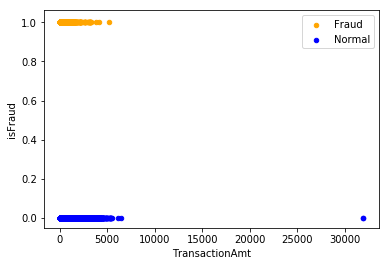

In [2]:
import sklearn as sk
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def score_to_numeric(x):
    if x=='nan':
        return 0
    if x=='discover':
        return 1
    if x=='mastercard':
        return 2
    if x=='visa':
        return 3
    if x=='american express':
        return 4

df = pd.read_csv("train_transaction.csv")
print(len(df))
df.head(10)

df['score_num'] = df['card4'].apply(score_to_numeric)

non_fraud = df.loc[df.isFraud == 0]
fraud = df.loc[df.isFraud == 1]
print(len(non_fraud))
print(len(fraud))

ax = fraud.plot.scatter(x="TransactionAmt", y="isFraud", color="Orange", label="Fraud")
non_fraud.plot.scatter(x="TransactionAmt", y="isFraud", color="Blue", label="Normal", ax=ax)

# ax = fraud.plot.scatter(x="score_num", y="TransactionAmt", color="Orange", label="Fraud")
# non_fraud.plot.scatter(x="score_num", y="TransactionAmt", color="Blue", label="Normal", ax=ax)



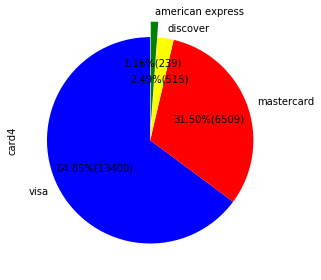

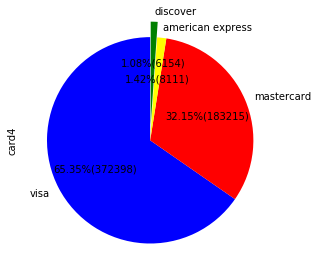

In [3]:
# plot for fraud
counts = fraud.card4.value_counts()
colors = ['blue', 'red', 'yellow', 'green']
counts.plot.pie(subplots=True,
           shadow=False,
           colors=colors, 
           explode=(0, 0, 0, 0.15),   # exploding 'Friday'
           startangle=90,
           autopct=lambda p: '{:.2f}%({:.0f})'.format(p, p/100 * len(fraud)))

plt.tight_layout()
plt.show()

# plot for normal
counts = non_fraud.card4.value_counts()
counts.plot.pie(subplots=True,
           shadow=False,
           colors=colors, 
           explode=(0, 0, 0, 0.15),   # exploding 'Friday'
           startangle=90,
           autopct=lambda p: '{:.2f}%({:.0f})'.format(p, p/100 * len(non_fraud)))

plt.tight_layout()
plt.show()

In [0]:
df = df.drop('card4', 1)
df = df.drop('P_emaildomain', 1)
df = df.drop('R_emaildomain', 1)
df = df.drop('ProductCD', 1)
df = df.drop('card6', 1)
# df = df.dropna(how='any')
# df.head()

In [0]:
df = df.drop('M1', 1)
df = df.drop('M2', 1)
df = df.drop('M3', 1)
df = df.drop('M4', 1)
df = df.drop('M5', 1)
df = df.drop('M6', 1)
df = df.drop('M7', 1)
df = df.drop('M8', 1)
df = df.drop('M9', 1)

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(df, df.isFraud, test_size=0.2)
X_train.fillna(X_test.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)


lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=10)
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
knn.fit(X_train,y_train)
knn.predict(X_test)


In [19]:
from sklearn.metrics import confusion_matrix

print(lr.score(X_test,y_test))
print(knn.score(X_test,y_test))
confusion_matrix(preds,y_test)

0.9651844074914485
0.9658702204761743


array([[113995,   4097],
       [    15,      1]])